# Chapter 5: Discussion
# Comparison of Model contrasts for different SRT reference models


<div class="alert alert-success">
    
This Notebook contains the figures of the Reference model discussion.

In [1]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.viewer.mpl      import createColorBarOnly

# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys
from    PlotFunctions_Ch4       import *


# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'

lim_ert = [0, 6300]
lim_srt = [0, 3500]

#Mapping matrial properties to units
rhomap = [[1,700], [2,700], [3,70], [4,7000]]
vmap = [[1,500], [2,4000], [3,3000], [4,2000]]

path = 'C:/Users/azieg/Documents/GitHub/JMEI_Paper/'

## Geometry for Comparison

In [2]:
# Create layered subsurface
world = mt.createWorld([-35,-20], [35, 0], layers=[-13],marker=1)
cube = mt.createRectangle(pos=[-8, -8], size=[9.0, 9.0],marker=3)
circ = mt.createCircle(pos=(8, -8), radius=4.5, nSegments=30,marker=4)
geom = world + circ + cube
geom_mesh = mt.createMesh(geom, area=0.5)

# True Models
r_true = np.array(geom_mesh.cellMarkers())
r_true[r_true == 1] = 700
r_true[r_true == 2] = 700
r_true[r_true == 3] = 70
r_true[r_true == 4] = 7000

v_true = np.array(geom_mesh.cellMarkers())
v_true[v_true == 1] = 500
v_true[v_true == 2] = 4000
v_true[v_true == 3] = 3000
v_true[v_true == 4] = 2000

# Start Models
r_start = pg.Vector(geom_mesh.cellCount(),619)
v_start = 500-4000/20*np.array(geom_mesh.cellCenters())[:,1]

# Adjusted SRT start model
r_ref = pg.Vector(geom_mesh.cellCount(),700)
v_ref = pg.Vector(geom_mesh.cellCount(),500)

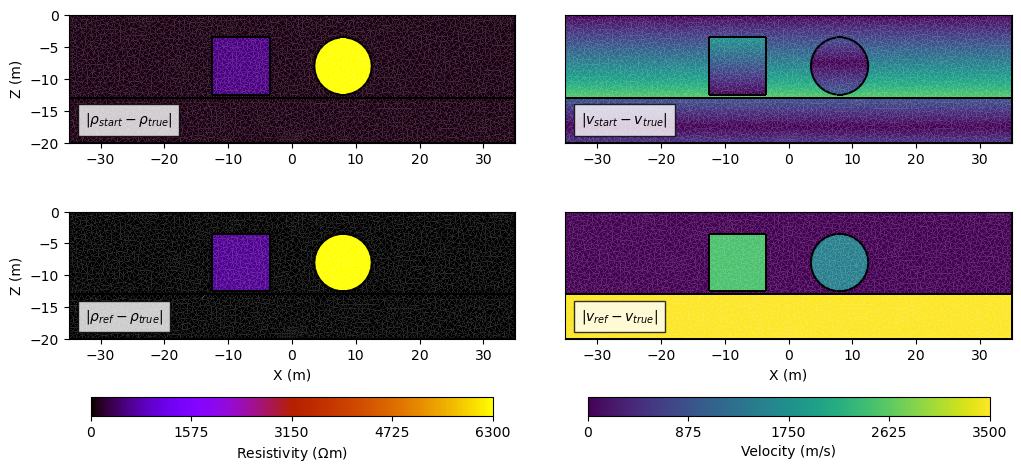

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10,4))
fig.tight_layout(pad=0.5)

pg.show(geom_mesh, abs(v_true-v_start), ax=ax[0,1], cMap=c_srt, cMin=0, cMax=3500, colorBar=False, logScale=False)
pg.show(geom_mesh, abs(r_true-r_start), ax=ax[0,0], cMap=c_ert, cMin=0, cMax=6300, colorBar=False, logScale=False)
pg.show(geom_mesh, abs(v_true-v_ref), ax=ax[1,1], cMap=c_srt, cMin=0, cMax=3500, colorBar=False, logScale=False)
pg.show(geom_mesh, abs(r_true-r_ref), ax=ax[1,0], cMap=c_ert, cMin=0, cMax=6300, colorBar=False, logScale=False)


    # Adjust axis labels
ax[0,0].set_ylabel('Z (m)')
ax[1,0].set_ylabel('Z (m)')
ax[1,0].set_xlabel('X (m)')
ax[1,1].set_xlabel('X (m)')
ax[0,1].set_yticks([])
ax[1,1].set_yticks([])
for axis in ax:
    for a in axis:
        a.set_xlim(-35,35)
        a.set_ylim(-20,0)

ax[0,0].text(-32.5, -17, r'$|\rho_{start}-\rho_{true}|$', fontsize=10,bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
ax[0,1].text(-32.5, -17, r'$|v_{start}-v_{true}|$', fontsize=10,bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
ax[1,0].text(-32.5, -17, r'$|\rho_{ref}-\rho_{true}|$', fontsize=10,bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
ax[1,1].text(-32.5, -17, r'$|v_{ref}-v_{true}|$', fontsize=10,bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    # Add colorbar ERT
cax1 = ax[1,0].inset_axes([0.05, -0.6, 0.9, 0.15])
createColorBarOnly(ax=cax1, cMin=0, cMax=6300, logScale=False,cMap=c_ert,
                      label=pg.unit('res'), orientation='horizontal')

    # Add colorbar SRT
cax2 = ax[1,1].inset_axes([0.05, -0.6, 0.9, 0.15])
createColorBarOnly(ax=cax2, cMin=0, cMax=3500, logScale=False,cMap=c_srt,
                      label=pg.unit('vel'), orientation='horizontal')

plt.savefig(path+f'Figures/Ch-5/ModelContrasts_comp.pdf', bbox_inches='tight',dpi=600)